So, here we will implement "Network in network" model by reading it's paper.

First of all, i want to talk about new ideas that this paper has brought to us. They are quite interesting and i was enjoying reading article.

### New ideas

**1. Use of Multi-linear perceptron**

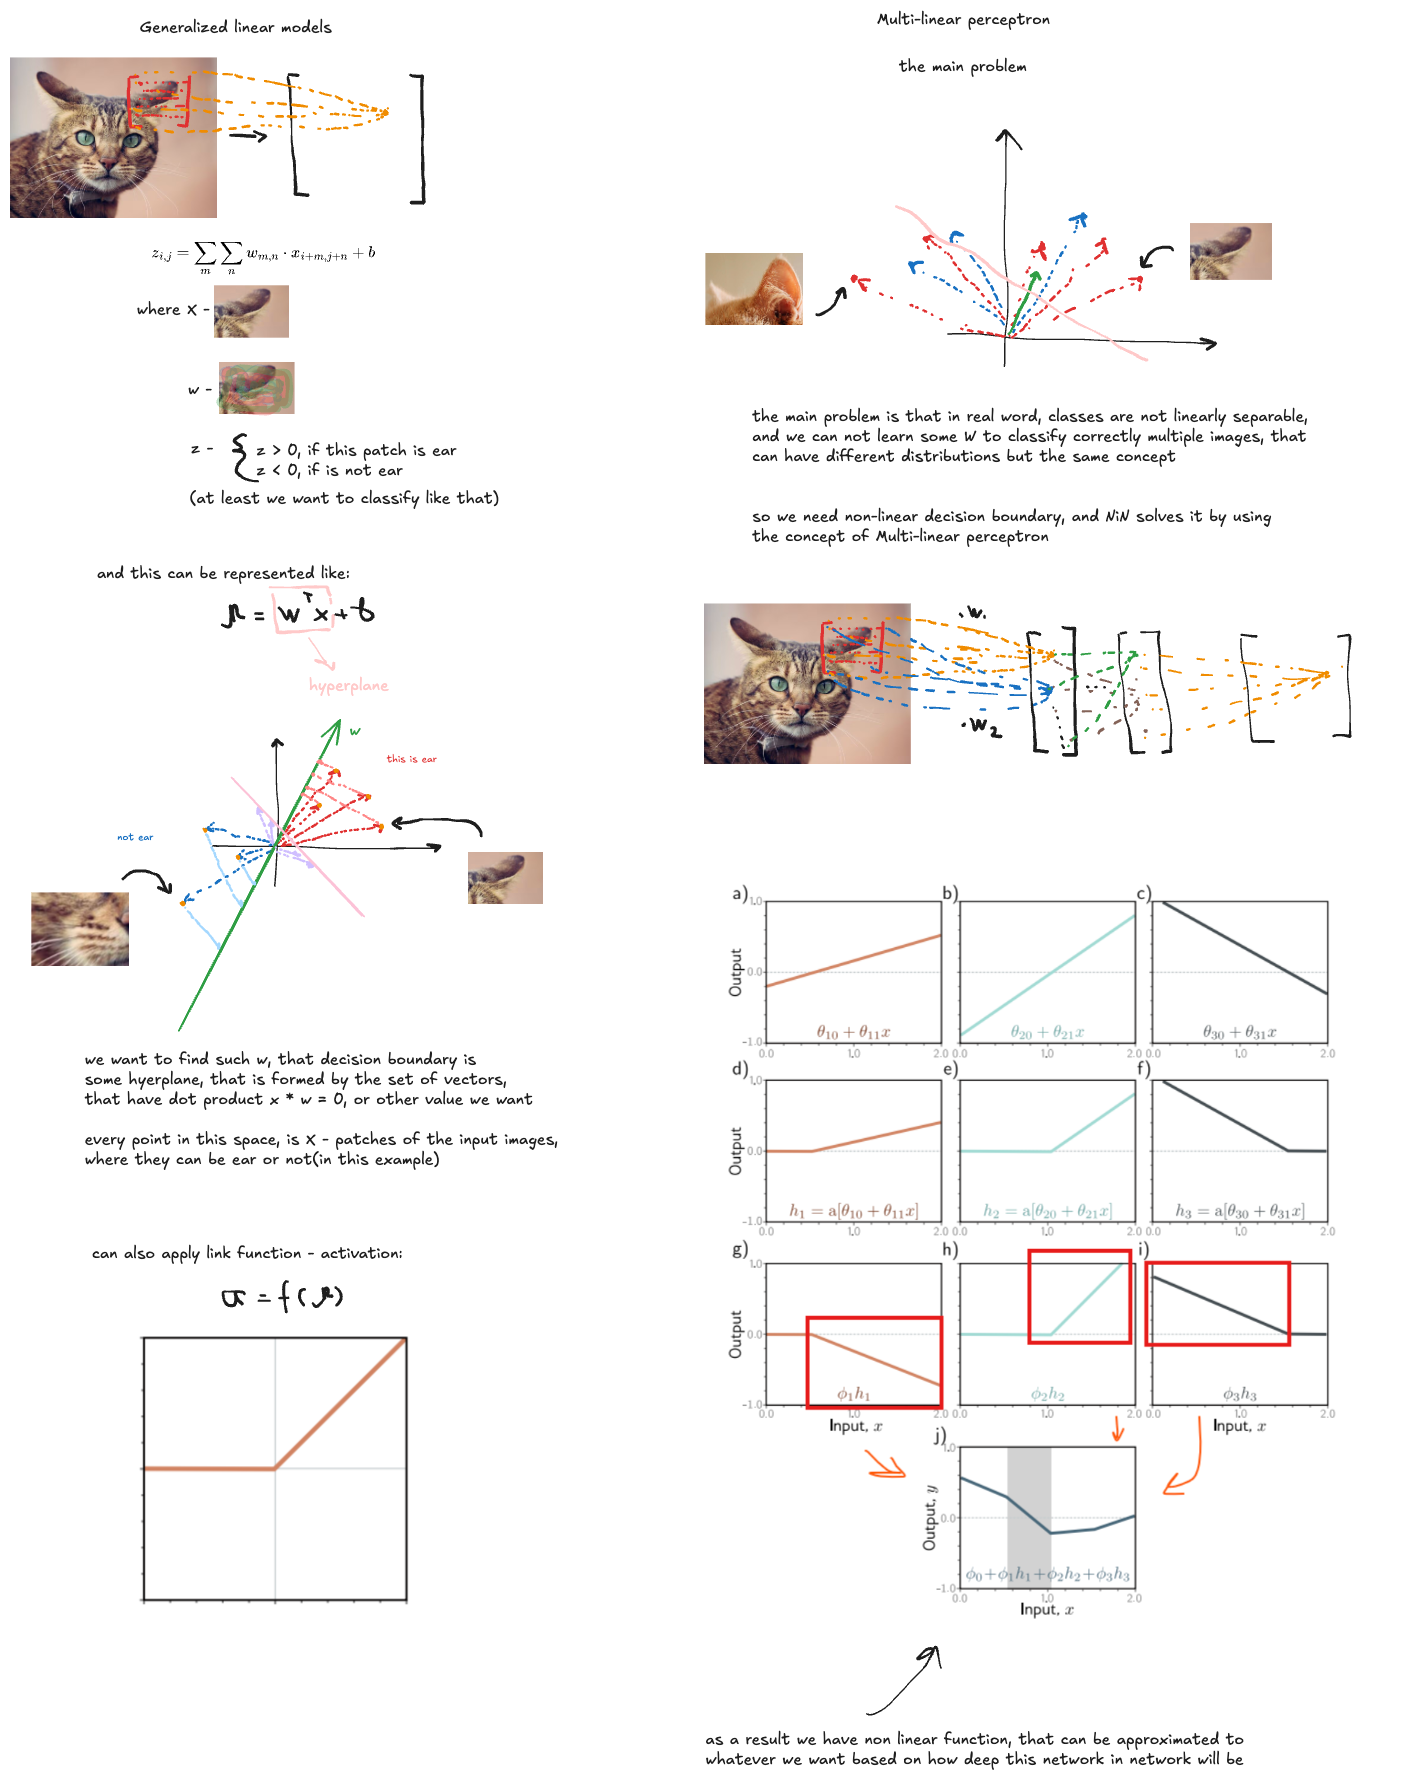

Above you can see my visualization and intuition about it, now i want to discuss it brirfly. The main problem that convential CNN's have - is that they assume that data is linearly separable. So, if we take some filter(kernel) that was learnt to detect eats in a image of a cat - CNN tries to separete it by hyperplane since convolution is linear operation.

From paper:
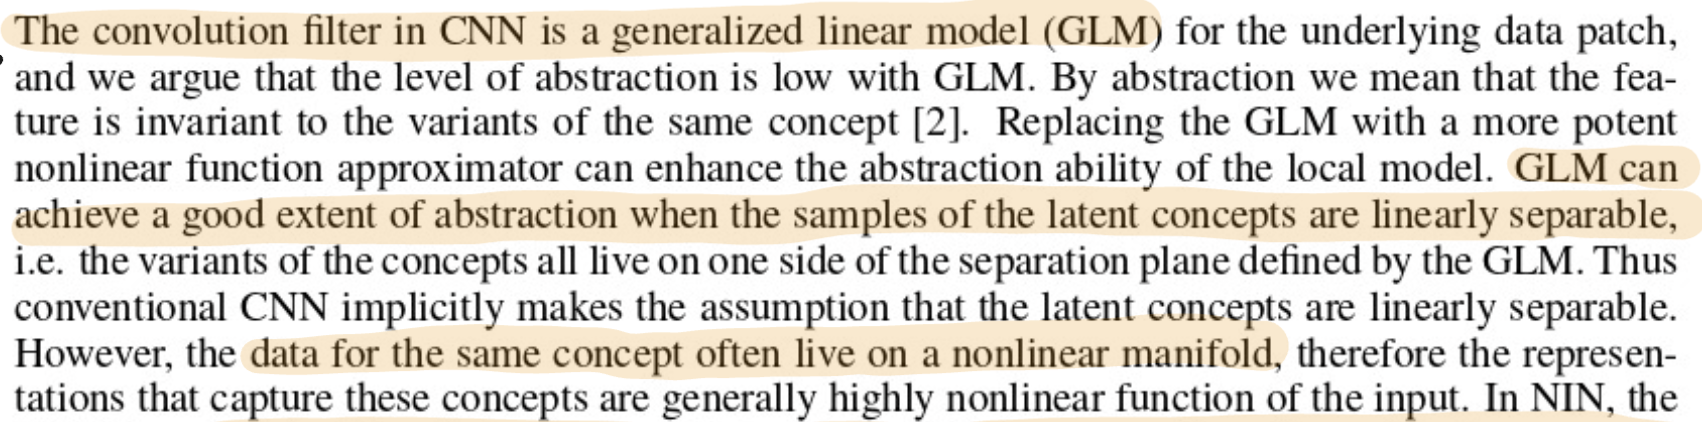

And researchers have found out solution: what if we replace GLM with Multi-linear perceptron - general non-linear fucntion approximator?

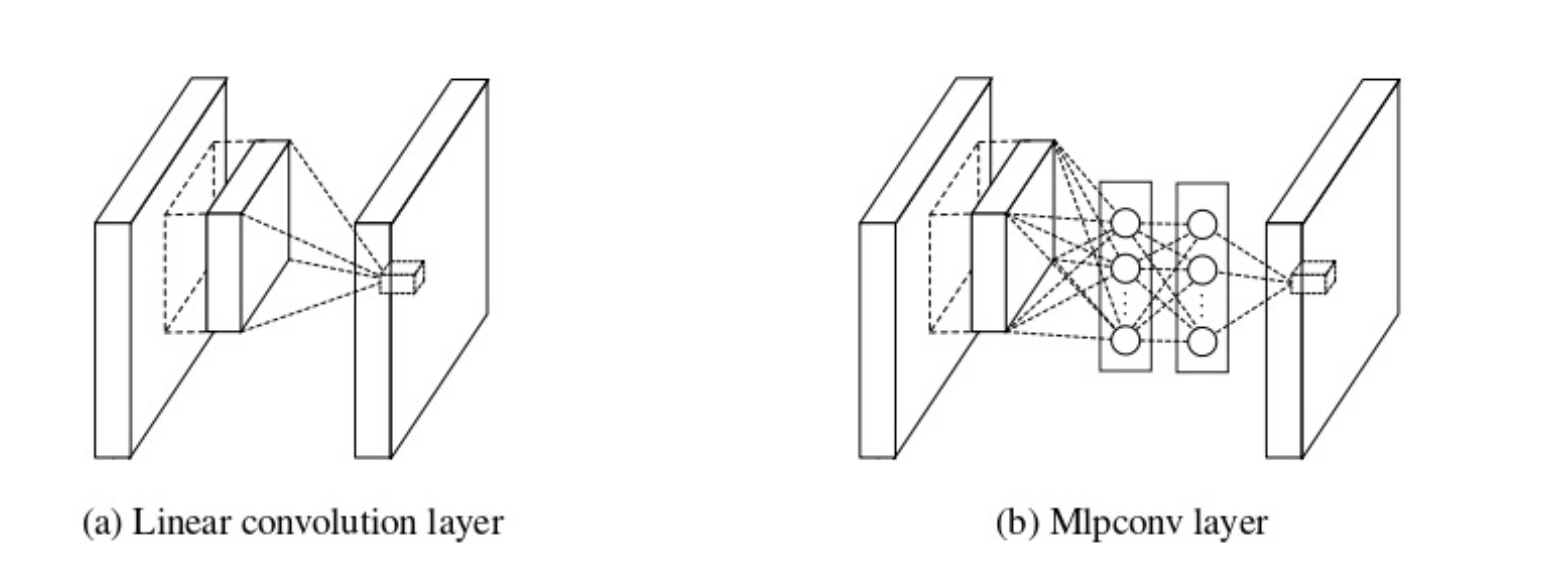

In the picture above we see, that for some pixel in feature map, we not just compute convolution of selected input patch and filter - we drop it trough $n$ numbers of MLP to introduce non-linearity(between each layer we use some activation function like ReLU):
$$f_{i,j,k_1}^1 = \max({w_{k_1}^1}^T x_{i,j} + b_{k_1}, 0)$$
$$\vdots$$
$$f_{i,j,k_n}^n = \max({w_{k_n}^n}^T f_{i,j}^{n-1} + b_{k_n}, 0)$$
- $x_{i,j}$: This is the input patch at location $(i,j)$. In the first layer, the MLP "slides" over this local area of the input image to extract features.
- $f_{i,j}^{n-1}$: This is the result (feature map) of the previous MLP layer. Because the MLP is a deep model itself, each subsequent layer takes the abstract representations calculated by the layer immediately before it to build higher-level features.

Here we can see reasons why such tecnique was chosen:
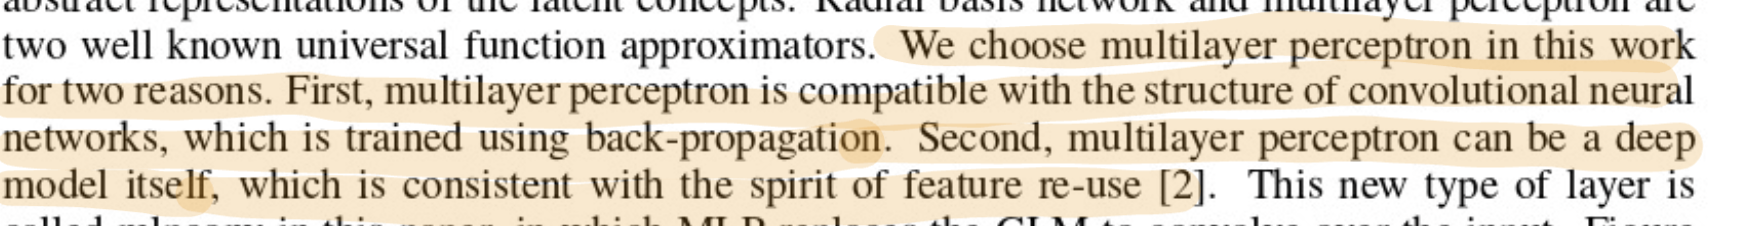

**2. Global average poooling**

We have used to the fact that, in general, CNN consists of two parts: feature extractor(Convolutional layers) and clasifier(Fully-connected layers). But here, in this paper, traditional set of FC in the end was not used. Instead, reseachers have used the idea of Global Average Pooling. This thing force model to extract N feature maps after last NiN block, where N is the number of classes. Each of these blocks represent the confidence map of how model is confident that some image is related to some class. And to get N x 1 vector which which goes through Softmax - we just apply Average Pooling to each feature map with kernel size 1 x 1.

The main benifits of Global Average Pooling are:
- the feature maps can be easily interpreted as categories confidence maps
- no parameter to optimize in the global average pooling, since we do not use fully connected layers, so it reduces the chances of overfitting, because in traditional CNN, the biggest number of learnible params is located in the FC layers, and sometimes, witout using regularization tecniques, such as Dropout, weight decay, Data Augmentation - they can provoke overfitting

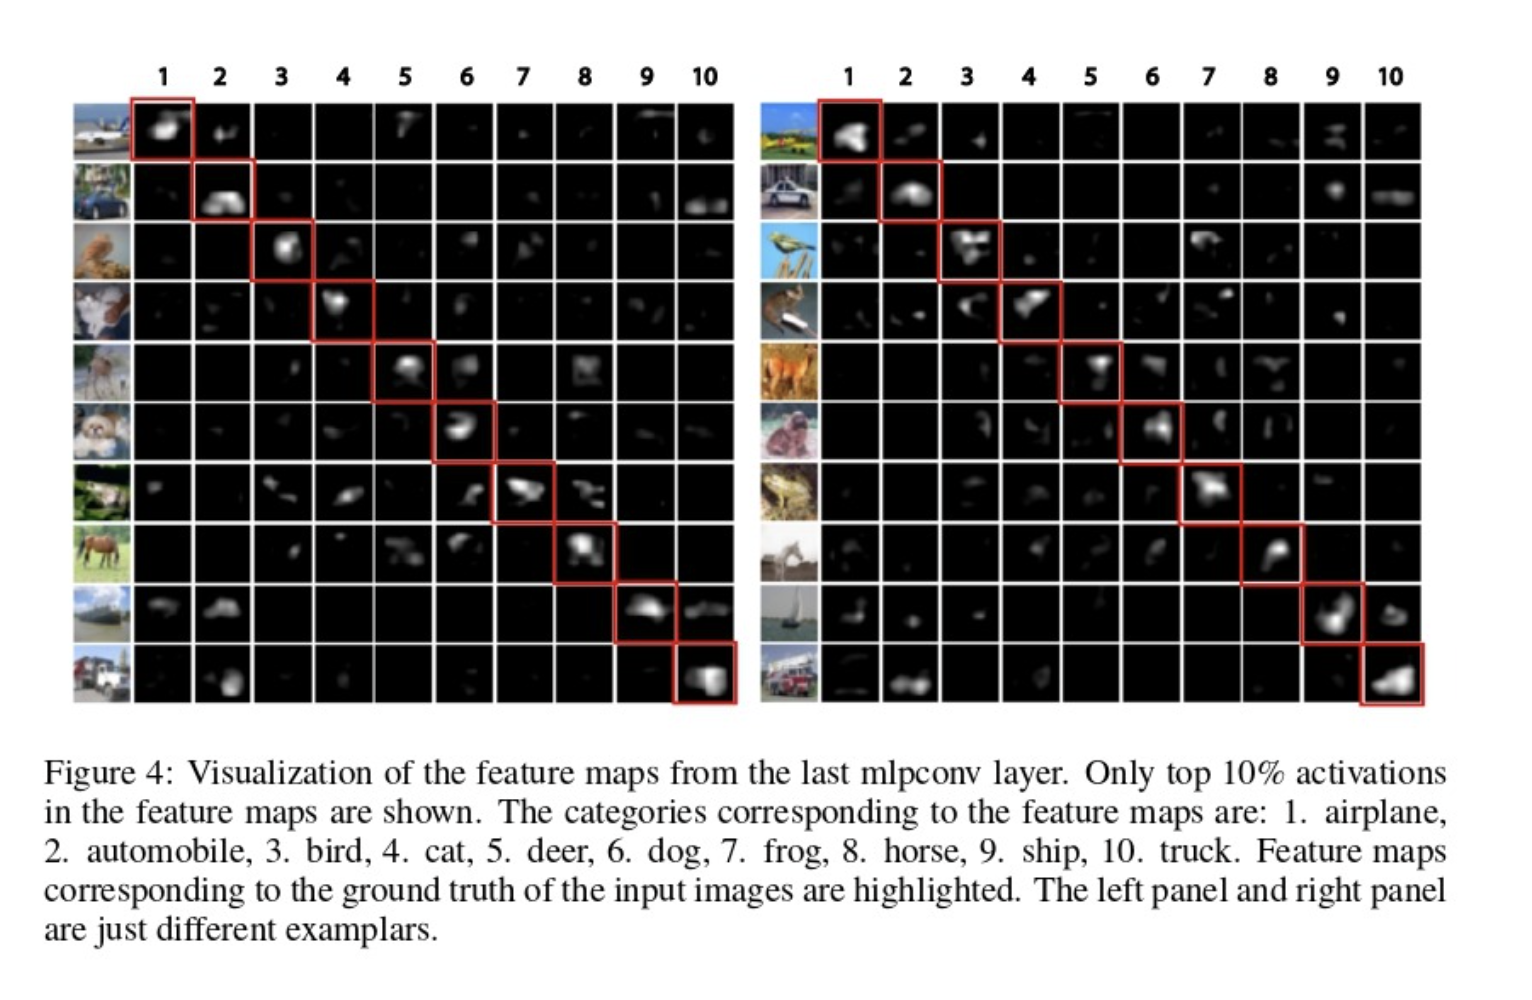